In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from google.colab import files

uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [0]:
df=pd.read_csv("./diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
y=df["Outcome"]
X=df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.30,
                                                  random_state=42)

In [6]:
!pip install xgboost

In [0]:
from xgboost import XGBClassifier

In [0]:
xgb_model=XGBClassifier().fit(X_train, y_train)

In [10]:
y_pred=xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

**Model Tuning**

In [0]:
xgb=XGBClassifier()

In [0]:
xgb_params={"learning_rate":[0.1,0.01,0.001],
            "n_estimators":[100,500,1000],
            "subsample":[0.6, 0.8, 1], #gözününde bulundurulacak örneklem oranı
            "max_depth":[3,5,7]}

In [16]:
xgb_cv_model=GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 425 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.0min finished


In [17]:
xgb_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.6}

In [0]:
xgb_tuned=XGBClassifier(learning_rate= 0.001, max_depth= 7, n_estimators= 500, subsample= 0.6).fit(X_train, y_train)

In [19]:
y_pred=xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

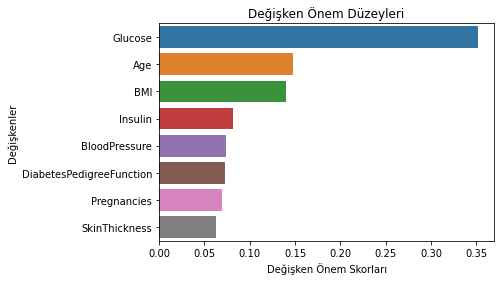

In [20]:
#değişken önem düzeyleri
feature_imp=pd.Series(xgb_tuned.feature_importances_,
                      index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()